# 实验3 图像特征

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import cv2
import numpy as np

luna_image_path = './luna.png'
saltednoise_image_path = './saltednoise.png'
hua_image_path = './hua.jpg'

### 1. 使用不同截断距离的二阶指数低通滤波器对图像“luna.png”进行滤波；观察并分析不同截断距离对该图像的滤波效果，并简要说明原因。

> 提示：该单元格输出是交互式的。由于`matplotlib.widgets`只能存在一个可交互的UI事件循环，因此如果下列结果无法交互只需重新运行下列单元格即可。

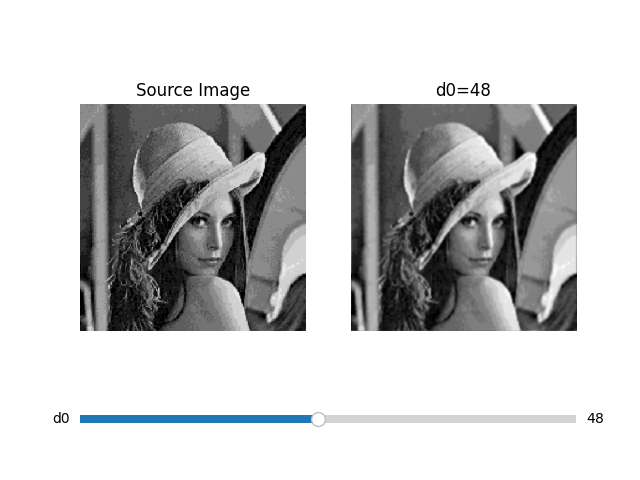

In [2]:
fig_interactive, ax_interactive = plt.subplot_mosaic('AB;CC',
                                                     height_ratios=[20, 1])

cutoff_distance_slider = widgets.Slider(ax_interactive['C'],
                                        label='d0',
                                        valmin=0, valmax=100, valinit=48, valstep=1)

gray_image = cv2.imread(luna_image_path, cv2.IMREAD_GRAYSCALE)

def update(val):

    def generate_mask(shape, d0):
        rows, cols = shape
        center_x, center_y = cols // 2, rows // 2

        x, y = np.meshgrid(np.arange(cols), np.arange(rows))

        distance = (x - center_x) ** 2 + (y - center_y) ** 2
        return np.exp(-distance / (2 * d0 ** 2))

    dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(dft)

    filtered_dft = dft_shifted * generate_mask(gray_image.shape, val)[..., np.newaxis]
    inverse_dft = cv2.idft(np.fft.ifftshift(filtered_dft))

    magnitude = cv2.magnitude(inverse_dft[..., 0], inverse_dft[..., 1])

    ax_interactive['B'].imshow(magnitude, cmap='gray')
    ax_interactive['B'].set_title(f'd0={val}')

    return magnitude


cutoff_distance_slider.on_changed(update)

ax_interactive['A'].imshow(gray_image, cmap='gray')
ax_interactive['A'].set_title(f'Source Image')
ax_interactive['A'].axis('off')

ax_interactive['B'].axis('off')

_ = update(48)

> 提示：重新运行下列单元格拷贝结果。

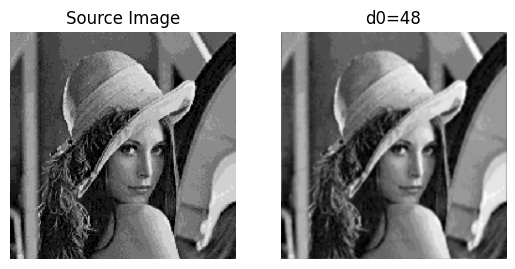

In [3]:
with plt.ioff():
    fig, ax = plt.subplots(1, 2)

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title(f'Source Image')
ax[0].axis('off')

ax[1].imshow(update(cutoff_distance_slider.val), cmap='gray')
ax[1].set_title(f'd0={cutoff_distance_slider.val}')
ax[1].axis('off')

display(fig)

### 2.	分别使用均值滤波器、中值滤波器和高斯滤波器对“saltednoise.png”图像进行滤波；观察并分析不同对该图像的滤波效果，并简要说明原因。尝试使用不同大小的卷积核对图像进行滤波，观察滤波效果有什么不同。

> 提示：该单元格输出是交互式的。由于`matplotlib.widgets`只能存在一个可交互的UI事件循环，因此如果下列结果无法交互只需重新运行下列单元格即可。

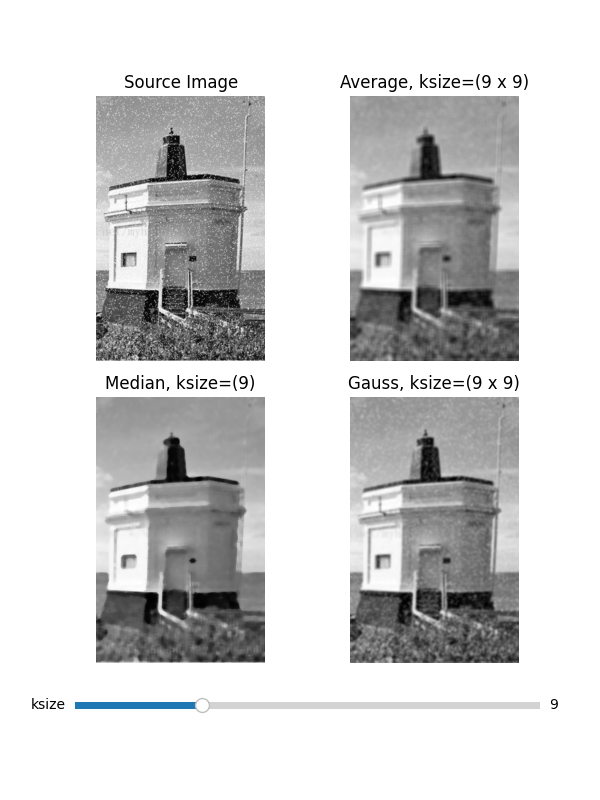

In [4]:
fig_interactive, ax_interactive = plt.subplot_mosaic('AB;CD;EE',
                                                     height_ratios=[20, 20, 1])

ksize_slider = widgets.Slider(ax_interactive['E'],
                              label='ksize', valmin=3, valmax=25, valinit=9, valstep=2)

source_image = cv2.imread(saltednoise_image_path, cv2.IMREAD_GRAYSCALE)

def update(val):
    avg = cv2.blur(source_image, ksize=(val,val))
    median = cv2.medianBlur(source_image, ksize=val)
    gauss = cv2.GaussianBlur(source_image, ksize=(val,val), sigmaX=0)

    ax_interactive['B'].imshow(avg, cmap='gray')
    ax_interactive['B'].set_title(f'Average, ksize=({val} x {val})')

    ax_interactive['C'].imshow(median, cmap='gray')
    ax_interactive['C'].set_title(f'Median, ksize=({val})')

    ax_interactive['D'].imshow(gauss, cmap='gray')
    ax_interactive['D'].set_title(f'Gauss, ksize=({val} x {val})')

    return avg, median, gauss


ksize_slider.on_changed(update)

ax_interactive['A'].imshow(source_image, cmap='gray')
ax_interactive['A'].set_title(f'Source Image')
ax_interactive['A'].axis('off')

ax_interactive['B'].axis('off')

ax_interactive['C'].axis('off')

ax_interactive['D'].axis('off')

fig_interactive.set_size_inches(6, 8)

_ = update(9)

> 提示：重新运行下列单元格拷贝结果。

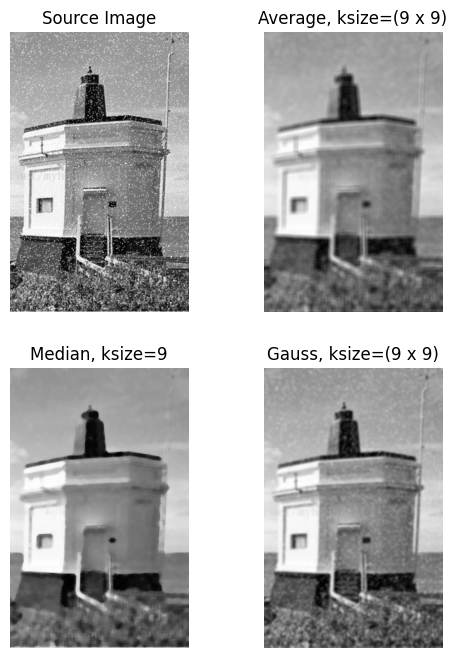

In [5]:
with plt.ioff():
    fig, ax = plt.subplots(2, 2)

ax[0, 0].imshow(source_image, cmap='gray')
ax[0, 0].set_title(f'Source Image')
ax[0, 0].axis('off')

images = update(ksize_slider.val)

ax[0, 1].imshow(images[0], cmap='gray')
ax[0, 1].axis('off')
ax[0, 1].set_title(f'Average, ksize=({ksize_slider.val} x {ksize_slider.val})')

ax[1, 0].imshow(images[1], cmap='gray')
ax[1, 0].set_title(f'Median, ksize={ksize_slider.val}')
ax[1, 0].axis('off')

ax[1, 1].imshow(images[2], cmap='gray')
ax[1, 1].set_title(f'Gauss, ksize=({ksize_slider.val} x {ksize_slider.val})')
ax[1, 1].axis('off')

fig.set_size_inches(6, 8)

display(fig)

### 3. 分别使用Sobel和Laplacian滤波器对图像“hua.jpg”进行滤波；观察并分析不同对该图像的滤波效果，并简要说明原因。

> 提示：该单元格输出是交互式的。由于`matplotlib.widgets`只能存在一个可交互的UI事件循环，因此如果下列结果无法交互只需重新运行下列单元格即可。

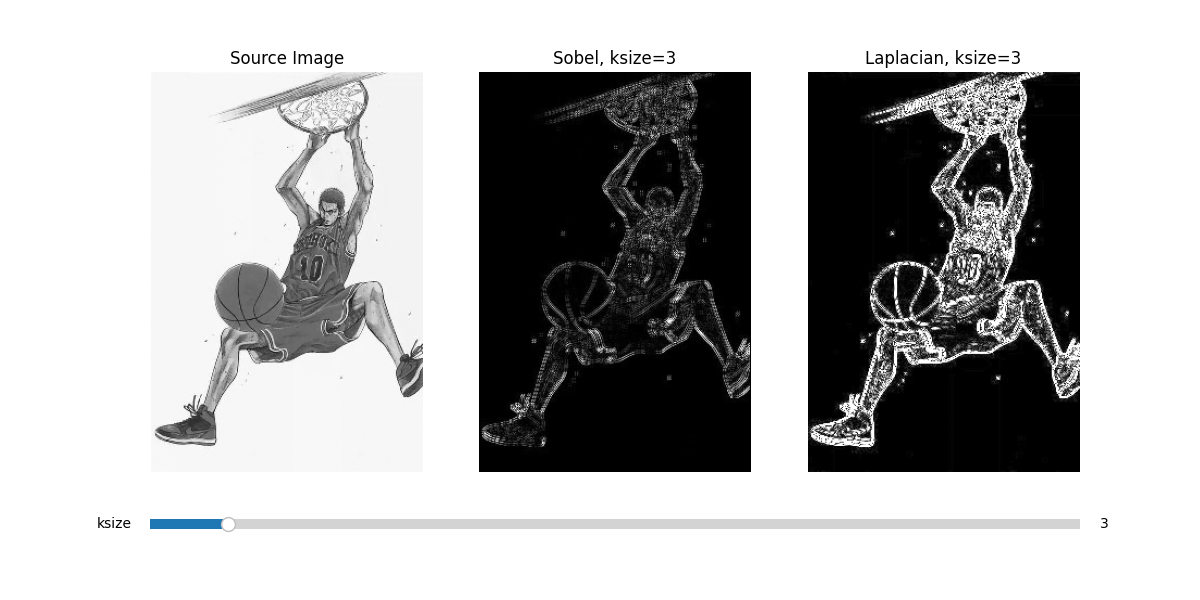

In [6]:
fig_interactive, ax_interactive = plt.subplot_mosaic('ABC;DDD',
                                                     height_ratios=[20, 1])

ksize_slider = widgets.Slider(ax_interactive['D'],
                              label='ksize', valmin=1, valmax=25, valinit=3, valstep=2)

source_image = cv2.imread(hua_image_path, cv2.IMREAD_GRAYSCALE)

def update(val):
    sobel = cv2.Sobel(source_image, ddepth=cv2.CV_32F, ksize=val, dx=1, dy=1)
    sobel = cv2.convertScaleAbs(sobel)
    laplacian = cv2.Laplacian(source_image, ddepth=cv2.CV_32F, ksize=val)
    laplacian = cv2.convertScaleAbs(laplacian)

    ax_interactive['B'].imshow(sobel, cmap='gray')
    ax_interactive['B'].set_title(f'Sobel, ksize={val}')

    ax_interactive['C'].imshow(laplacian, cmap='gray')
    ax_interactive['C'].set_title(f'Laplacian, ksize={val}')

    return sobel, laplacian


ksize_slider.on_changed(update)

ax_interactive['A'].imshow(source_image, cmap='gray')
ax_interactive['A'].set_title(f'Source Image')
ax_interactive['A'].axis('off')

ax_interactive['B'].axis('off')

ax_interactive['C'].axis('off')

ax_interactive['D'].axis('off')

fig_interactive.set_size_inches(12, 6)

_ = update(3)

> 提示：重新运行下列单元格拷贝结果。

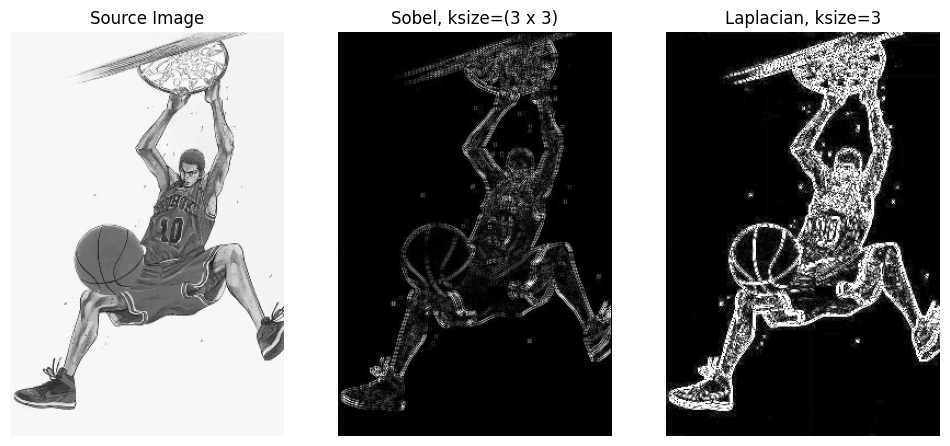

In [7]:
with plt.ioff():
    fig, ax = plt.subplots(1, 3)

ax[0].imshow(source_image, cmap='gray')
ax[0].set_title(f'Source Image')
ax[0].axis('off')

images = update(ksize_slider.val)

ax[1].imshow(images[0], cmap='gray')
ax[1].axis('off')
ax[1].set_title(f'Sobel, ksize=({ksize_slider.val} x {ksize_slider.val})')

ax[2].imshow(images[1], cmap='gray')
ax[2].set_title(f'Laplacian, ksize={ksize_slider.val}')
ax[2].axis('off')

fig.set_size_inches(12, 6)

display(fig)

### 4. 使用Canny算法对图像“hua.jpg”进行边缘检测，比较并分析结果与内容3结果的差异

> 提示：该单元格输出是交互式的。由于`matplotlib.widgets`只能存在一个可交互的UI事件循环，因此如果下列结果无法交互只需重新运行下列单元格即可。

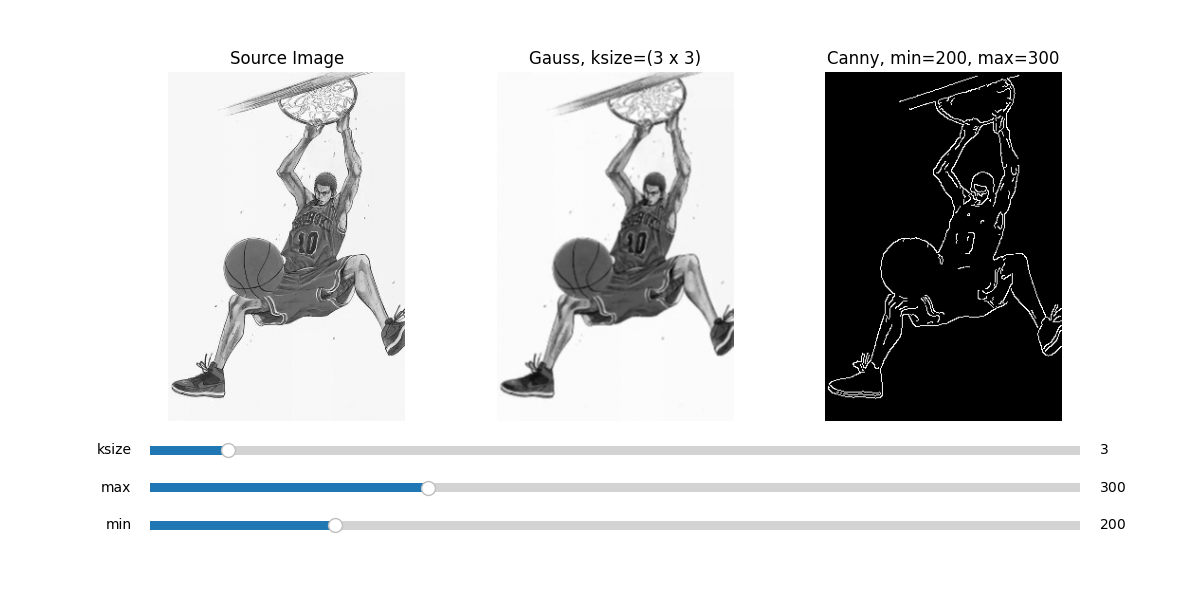

In [8]:
fig_interactive, ax_interactive = plt.subplot_mosaic('ABC;DDD;EEE;FFF',
                                                     height_ratios=[20, 1, 1, 1])

ksize_slider = widgets.Slider(ax_interactive['D'],
                              label='ksize', valmin=1, valmax=25, valinit=3, valstep=2)

canny_min_slider = widgets.Slider(ax_interactive['F'],
                                  label='min', valmin=1, valmax=1000, valinit=200, valstep=1)

canny_max_slider = widgets.Slider(ax_interactive['E'],
                                  label='max', valmin=1, valmax=1000, valinit=300, valstep=1)


source_image = cv2.imread(hua_image_path, cv2.IMREAD_GRAYSCALE)

def update(_):
    gauss = cv2.GaussianBlur(source_image, ksize=(ksize_slider.val, ksize_slider.val), sigmaX=0)
    canny = cv2.Canny(gauss, canny_min_slider.val, canny_max_slider.val)

    ax_interactive['B'].imshow(gauss, cmap='gray')
    ax_interactive['B'].set_title(f'Gauss, ksize=({ksize_slider.val} x {ksize_slider.val})')

    ax_interactive['C'].imshow(canny, cmap='gray')
    ax_interactive['C'].set_title(f'Canny, min={canny_min_slider.val}, max={canny_max_slider.val}')

    return gauss, canny


ksize_slider.on_changed(update)
canny_min_slider.on_changed(update)
canny_max_slider.on_changed(update)

ax_interactive['A'].imshow(source_image, cmap='gray')
ax_interactive['A'].set_title(f'Source Image')

[a.axis('off') for a in ax_interactive.values()]

fig_interactive.set_size_inches(12, 6)

_ = update(None)

> 提示：重新运行下列单元格拷贝结果。

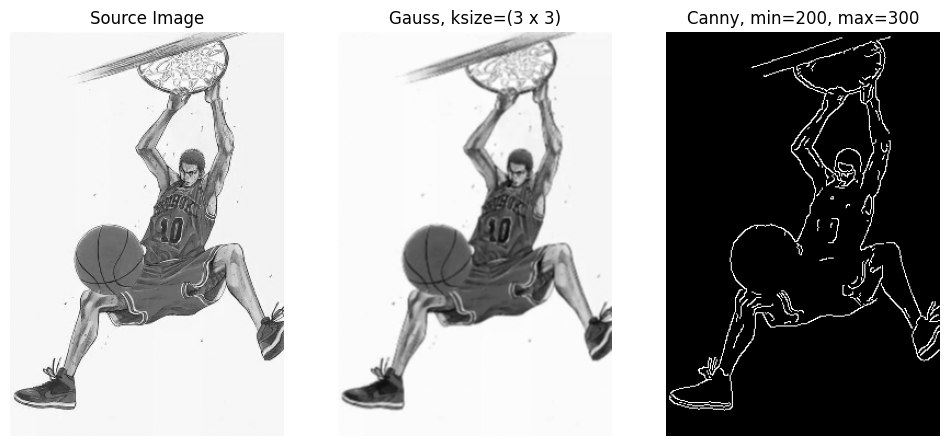

In [9]:
with plt.ioff():
    fig, ax = plt.subplots(1, 3)

ax[0].imshow(source_image, cmap='gray')
ax[0].set_title(f'Source Image')
ax[0].axis('off')

images = update(ksize_slider.val)

ax[1].imshow(images[0], cmap='gray')
ax[1].axis('off')
ax[1].set_title(f'Gauss, ksize=({ksize_slider.val} x {ksize_slider.val})')

ax[2].imshow(images[1], cmap='gray')
ax[2].set_title(f'Canny, min={canny_min_slider.val}, max={canny_max_slider.val}')
ax[2].axis('off')

fig.set_size_inches(12, 6)

display(fig)

**本地代码**（仅供参考）

1) 使用不同截断距离的二阶指数低通滤波器对图像“luna.png”进行滤波；观察并分析不同截断距离对该图像的滤波效果，并简要说明原因。

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

path = '修改为实际图片路径'
d0 = 35

def gaussLowPass(shape, d0):
    return np.array([[[np.exp(-(i * i + j * j) / d0 / d0) for _ in range(2)]
                      for j in range(-shape[1] // 2, shape[1] // 2)]
                     for i in range(-shape[0] // 2, shape[0] // 2, 1)])


image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(image.astype(np.float32),
              flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
mask = gaussLowPass(image.shape, d0)
idft = dft_shift * mask

image_filtered = cv2.idft(np.fft.ifftshift(idft))

result = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Source Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'd0={d0}')
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()

```

2) 分别使用均值滤波器、中值滤波器和高斯滤波器对“saltednoise.png”图像进行滤波；观察并分析不同对该图像的滤波效果，并简要说明原因。尝试使用不同大小的卷积核对图像进行滤波，观察滤波效果有什么不同。

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

path = '替换为实际图片路径'


def gaussLowPass(shape, d0):
    return np.array([[[np.exp(-(i * i + j * j) / d0 / d0) for _ in range(2)]
                      for j in range(-shape[1] // 2, shape[1] // 2)]
                     for i in range(-shape[0] // 2, shape[0] // 2, 1)])


image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

avg = cv2.blur(image, ksize=(3,3))
median = cv2.medianBlur(image, ksize=7)
gauss = cv2.GaussianBlur(image, ksize=(5,5), sigmaX=0)

plt.figure(figsize=(8,12))

plt.subplot(2, 2, 1)
plt.title('Source Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title(f'avg')
plt.imshow(avg, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title(f'median')
plt.imshow(median, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title(f'gauss')
plt.imshow(gauss, cmap='gray')
plt.axis('off')

plt.show()
```

3) 分别使用Sobel和Laplacian滤波器对图像“hua.jpg”进行滤波；观察并分析不同对该图像的滤波效果，并简要说明原因。

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

path = '替换为实际图片路径'


def gaussLowPass(shape, d0):
    return np.array([[[np.exp(-(i * i + j * j) / d0 / d0) for _ in range(2)]
                      for j in range(-shape[1] // 2, shape[1] // 2)]
                     for i in range(-shape[0] // 2, shape[0] // 2, 1)])


image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

sobel = cv2.Sobel(image, ddepth=cv2.CV_32F, ksize=3, dx=1, dy=1)
sobel = cv2.convertScaleAbs(sobel)
laplacian = cv2.Laplacian(image, ddepth=cv2.CV_32F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(15,10))

plt.subplot(1, 3, 1)
plt.title('Source Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'sobel')
plt.imshow(sobel, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'laplacian')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.show()
```

4) 使用Canny算法对图像“hua.jpg”进行边缘检测，比较并分析结果与内容3结果的差异。

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

path = '替换为实际图片路径'


def gaussLowPass(shape, d0):
    return np.array([[[np.exp(-(i * i + j * j) / d0 / d0) for _ in range(2)]
                      for j in range(-shape[1] // 2, shape[1] // 2)]
                     for i in range(-shape[0] // 2, shape[0] // 2, 1)])


image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

gray = cv2.GaussianBlur(image, ksize=(3,3), sigmaX=0)
canny = cv2.Canny(gray, 200, 300)

plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.title('Source Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'canny')
plt.imshow(canny, cmap='gray')
plt.axis('off')

plt.show()
```